In [1]:
import numpy as np
import matplotlib.pyplot as plt

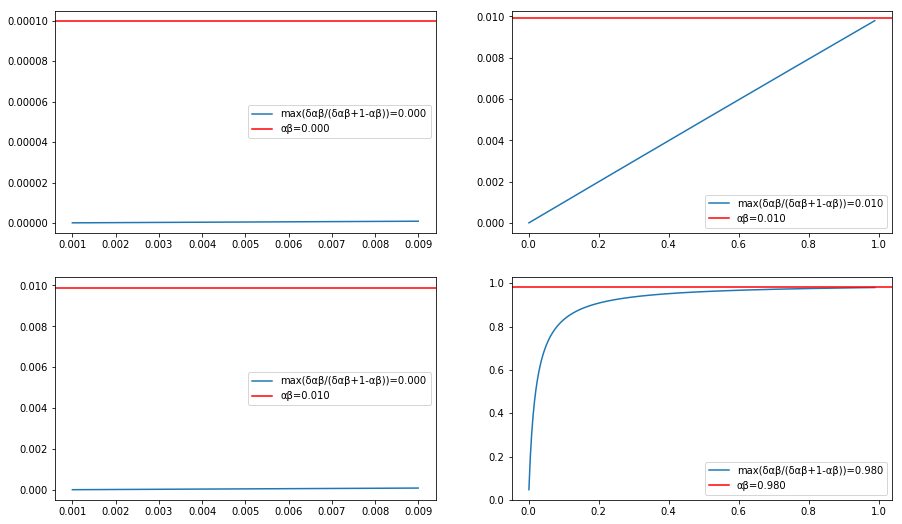

[]


In [2]:
αs=[0.01, 0.99]
βs= [0.01, 0.99]

fig, axes = plt.subplots(2,2, figsize=(15,9))

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        α = αs[i]
        β = βs[j]
        δ=np.linspace(0.001, β-0.001,500)
        def zero():
            return α*β

        def other(δ):
            return (δ*α*β)/(δ*α*β+1-α*β)
        
        ax.plot(δ, other(δ), label=f'max(δαβ/(δαβ+1-αβ))={max(other(δ)):.3f}')
        ax.axhline(zero(), label=f'αβ={zero():.3f}',color='r')
        ax.legend()

plt.show()

compar = zero()<=other(δ)
print(compar[compar==True])

### c)

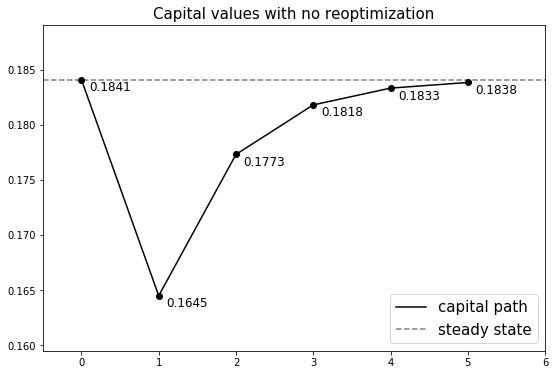

In [20]:
β = 1/1.03
α = 1/3
δ = 0.85
T=6

g = (α*β*δ)/(1+α*β*δ-α*β)

k0 = (α*β)**(1/(1-α))
k1 = g*k0**(α)

def LMC(k):
    return (α*β)*k**α

capital_path = np.empty(T)
capital_path[0] = k0
capital_path[1] = k1

for t in range(1, T-1):
    current_k = capital_path[t]
    next_k = LMC(current_k)
    capital_path[t+1] = next_k

# print(capital_path)    

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(T), capital_path, c='k', label='capital path')
ax.scatter(range(T), capital_path, marker='o', c='k')
ax.axhline((α*β)**(1/(1-α)), color='k', label='steady state', ls='--', alpha=0.5)
for i, k in enumerate(capital_path):
    ax.annotate(f'{k:.4f}', (i+0.1,k-0.001), fontsize=12)
ax.set(xlim=(-0.5,6), ylim=(min(capital_path)-0.005,max(capital_path)+0.005))
ax.legend(loc=4, fontsize=15)
ax.set_title('Capital values with no reoptimization', fontsize=15)
plt.savefig('Macro1b_PS2_P2c')
plt.show()

### d)

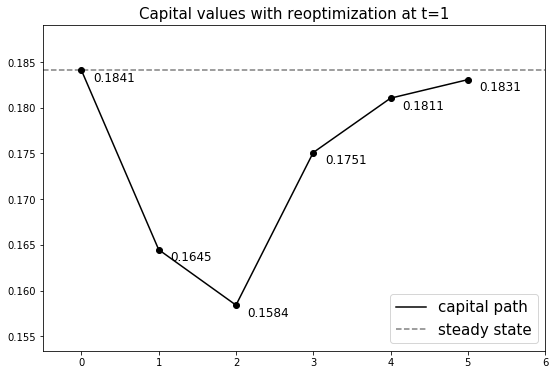

In [15]:
capital_path = np.empty(T)
capital_path[0] = k0
capital_path[1] = k1
capital_path[2] = g*k1**α

for t in 3,4,5:
    capital_path[t] = LMC(capital_path[t-1])

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(T), capital_path, c='k', label='capital path')
ax.scatter(range(T), capital_path, marker='o', c='k')
ax.axhline((α*β)**(1/(1-α)), color='k', label='steady state', ls='--', alpha=0.5)
for i, k in enumerate(capital_path):
    ax.annotate(f'{k:.4f}', (i+0.15,k-0.0012), fontsize=12)
ax.set(xlim=(-0.5,6), ylim=(min(capital_path)-0.005,max(capital_path)+0.005))
ax.legend(loc=4, fontsize=15)
ax.set_title('Capital values with reoptimization at t=1', fontsize=15)
plt.savefig('Macro1b_PS2_P2d')
plt.show()

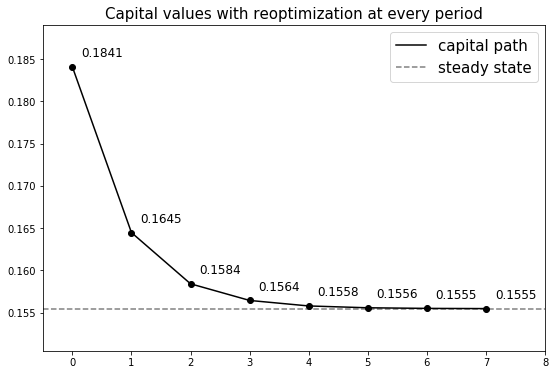

In [17]:
T=8

LMC = lambda k: g*k**α

capital_path = np.empty(T)
capital_path[0] = k0

for t in range(0,T-1):
    capital_path[t+1] = LMC(capital_path[t])
    
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(T), capital_path, c='k', label='capital path')
ax.scatter(range(T), capital_path, marker='o', c='k')
ax.axhline((g)**(1/(1-α)), color='k', label='steady state', ls='--', alpha=0.5)
for i, k in enumerate(capital_path):
    ax.annotate(f'{k:.4f}', (i+0.15,k+0.0012), fontsize=12)
ax.set(xlim=(-0.5,T), ylim=(min(capital_path)-0.005,max(capital_path)+0.005))
ax.legend(loc=1, fontsize=15)
ax.set_title('Capital values with reoptimization at every period', fontsize=15)
plt.savefig('Macro1b_PS2_P2bonus')
plt.show()